# Analysis of Housing Land Supply in Scotland 2022-2023

This is 

### Importing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/faithhyam/Coding/Housing_Project/Housing_Land_Supply_-_Scotland.csv')

df.to_csv('cleaned_housing_land_supply.csv', index=False)


### Basic Summaries

First 5 Rows

In [82]:
df.head()

,FID,sh_date_uploaded,local_authority,site_reference,la_s_code,sh_src,sh_src_id
0,pub_hls22to23.1,2024-03-21,East Renfrewshire,ERRF0539,S12000011,282794e1-86c9-4d56-abc6-2f48838a5866,1
1,pub_hls22to23.2,2024-03-21,East Renfrewshire,EREW0044,S12000011,282794e1-86c9-4d56-abc6-2f48838a5866,2
2,pub_hls22to23.3,2024-03-21,East Renfrewshire,EREW0109,S12000011,282794e1-86c9-4d56-abc6-2f48838a5866,3
3,pub_hls22to23.6,2024-03-21,East Renfrewshire,ER0080,S12000011,282794e1-86c9-4d56-abc6-2f48838a5866,6
4,pub_hls22to23.7,2024-03-21,East Renfrewshire,ER0062,S12000011,282794e1-86c9-4d56-abc6-2f48838a5866,7


Column Names, Data Types, and Missing Values

In [83]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FID               3342 non-null   object
 1   sh_date_uploaded  3342 non-null   object
 2   local_authority   3342 non-null   object
 3   site_reference    3342 non-null   object
 4   la_s_code         3342 non-null   object
 5   sh_src            3342 non-null   object
 6   sh_src_id         3342 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 182.9+ KB


None

Summary Statistics for Numerical Columns

In [84]:
df.describe()

,sh_src_id
count,3342.000000
mean,129.647516
std,105.961196
min,1.000000
25%,43.000000
50%,98.000000
75%,199.000000
max,460.000000


Number of Missing Values per Column

In [85]:
df.isnull().sum() 

FID                 0
sh_date_uploaded    0
local_authority     0
site_reference      0
la_s_code           0
sh_src              0
sh_src_id           0
dtype: int64

List of all Column Names

In [86]:
df.columns

Index(['FID', 'sh_date_uploaded', 'local_authority', 'site_reference',
       'la_s_code', 'sh_src', 'sh_src_id'],
      dtype='object')

Rows, Columns 

In [87]:
df.shape

(3342, 7)

### Cleaning Data 

In [88]:
df.columns = ['audit_reference', 'date_uploaded', 'local_authority', 'site_reference',
              'local_authority_code', 'unique_identifier', 'completion_status']


In [89]:
df['date_uploaded'] = pd.to_datetime(df['date_uploaded'], errors='coerce')

In [90]:
df['date_uploaded'].dtype

dtype('<M8[ns]')

### Filtering by Local Authority and Dates 

In [91]:
east_renfrewshire_data = df[df['local_authority'] == 'East Renfrewshire']

In [92]:
march_data = df[(df['date_uploaded'] >= '2024-03-01') & (df['date_uploaded'] <= '2024-03-31')]

In [93]:
east_renfrewshire_data.head(), march_data.head()

(   audit_reference date_uploaded    local_authority site_reference  \
 0  pub_hls22to23.1    2024-03-21  East Renfrewshire       ERRF0539   
 1  pub_hls22to23.2    2024-03-21  East Renfrewshire       EREW0044   
 2  pub_hls22to23.3    2024-03-21  East Renfrewshire       EREW0109   
 3  pub_hls22to23.6    2024-03-21  East Renfrewshire         ER0080   
 4  pub_hls22to23.7    2024-03-21  East Renfrewshire         ER0062   
 
   local_authority_code                     unique_identifier  \
 0            S12000011  282794e1-86c9-4d56-abc6-2f48838a5866   
 1            S12000011  282794e1-86c9-4d56-abc6-2f48838a5866   
 2            S12000011  282794e1-86c9-4d56-abc6-2f48838a5866   
 3            S12000011  282794e1-86c9-4d56-abc6-2f48838a5866   
 4            S12000011  282794e1-86c9-4d56-abc6-2f48838a5866   
 
    completion_status  
 0                  1  
 1                  2  
 2                  3  
 3                  6  
 4                  7  ,
    audit_reference date_uploaded  

### Housing Completions by Local Authority

In [94]:
completions_by_la = df.groupby('local_authority')['completion_status'].sum().reset_index()

In [95]:
completions_by_la.sort_values('completion_status', ascending=False, inplace=True)

In [96]:
completions_by_la.head()

,local_authority,completion_status
10,Fife,106030
11,Glasgow City,65341
12,Highland,63903
1,Aberdeenshire,52326
14,North Lanarkshire,36046


### Distribution of Completion Status

In [97]:
df['date_uploaded'].dtype

dtype('<M8[ns]')

In [98]:
completion_counts = df['completion_status'].value_counts()

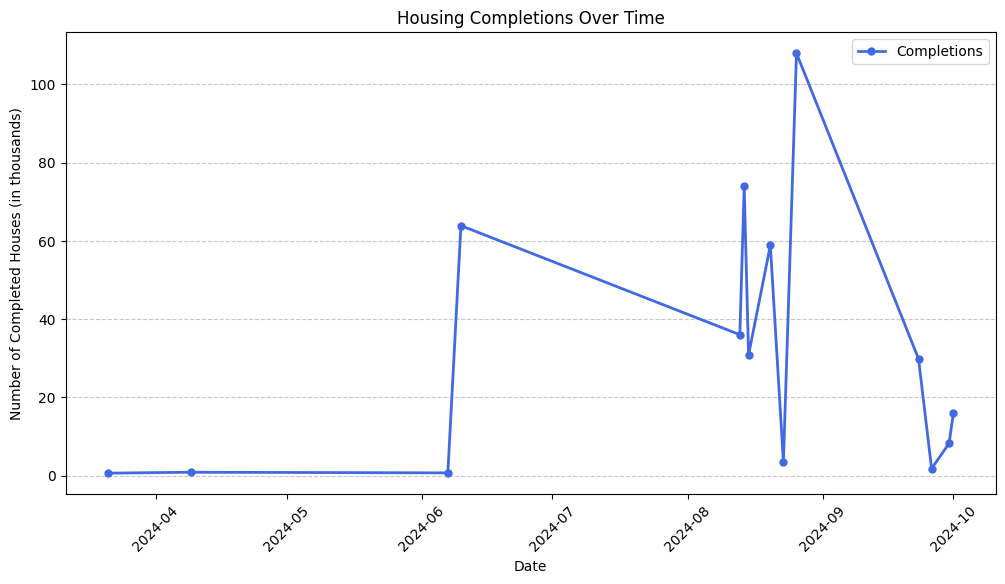

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(completions_by_date['date_uploaded'], completions_by_date['completion_status'] / 1000, 
         marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=5, label="Completions")


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show only every month 

plt.xticks(rotation=45)  # Rotate for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Labels & Title
plt.xlabel('Date')
plt.ylabel('Number of Completed Houses (in thousands)')
plt.title('Housing Completions Over Time')
plt.legend()

plt.show()

### Number of Local Authorities in Data 

In [149]:
num_local_authorities = completions_by_la['local_authority'].nunique()
print(f"Total number of local authorities: {num_local_authorities}")

Total number of local authorities: 20


### Date Analysis: Housing Trends Over Time

<Figure size 500x600 with 0 Axes>

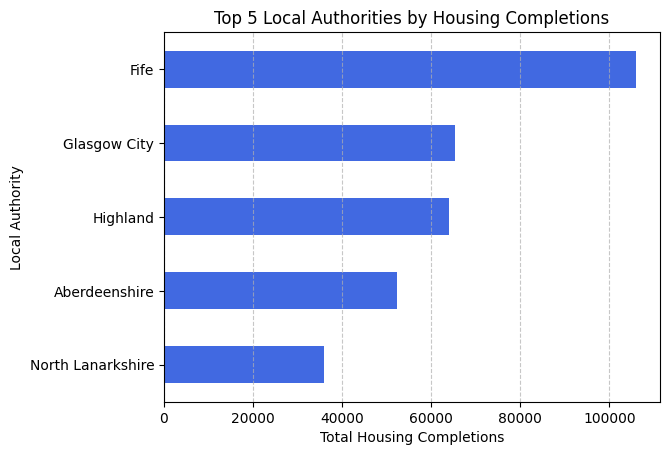

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
completions_by_la.sort_values(by='completion_status', ascending=True).tail(5).plot(
    kind='barh', x='local_authority', y='completion_status', color='royalblue', legend=False
)
plt.xlabel('Total Housing Completions')
plt.ylabel('Local Authority')
plt.title('Top 5 Local Authorities by Housing Completions')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<Figure size 2000x600 with 0 Axes>

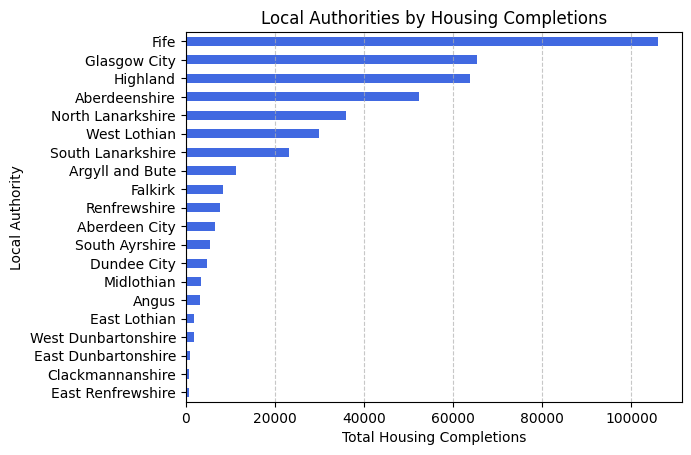

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
completions_by_la.sort_values(by='completion_status', ascending=True).tail(20).plot(
    kind='barh', x='local_authority', y='completion_status', color='royalblue', legend=False
)
plt.xlabel('Total Housing Completions')
plt.ylabel('Local Authority')
plt.title('Local Authorities by Housing Completions')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Analysing Specific Sites

In [162]:
site_data = df[df['site_reference'] == 'ERRF0539']
site_data.head()

,audit_reference,date_uploaded,local_authority,site_reference,local_authority_code,unique_identifier,completion_status
0,pub_hls22to23.1,2024-03-21,East Renfrewshire,ERRF0539,S12000011,282794e1-86c9-4d56-abc6-2f48838a5866,1
